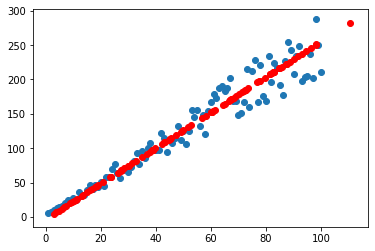

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#载入数据
data = np.genfromtxt("data.csv",delimiter=',')
x_data = data[:,0]
y_data = data[:,1]

#### ----------------------  PCA 算法 ----------------------
## 1. 对所有样本进行中心化
def zeroMean(dataMat):
    #按列求平均，即每个特征的平均值
    meanVal = np.mean(dataMat,axis=0)
    newData = dataMat - meanVal
    return newData,meanVal

newData,meanVal = zeroMean(data)

##2. 计算样本的协方差矩阵 利用np.cov函数，参数rowvar=0说明数据一行代表一个样本
covMat = np.cov(newData,rowvar=0)

##3.  np.linalg.eig求矩阵的特征值(eigVals)和特征向量(eigVects)
eigVals,eigVects = np.linalg.eig(np.mat(covMat))

##4.  对特征值从小到大排序
eigValIndice = np.argsort(eigVals)

##5. 选取top个特征值的下标
top = 1
n_eigValIndice = eigValIndice[-1:-(top+1):-1]

### 最大的n个特征值对应的特征向量
n_eigVect = eigVects[:,n_eigValIndice]

#### 将高维数据转成低维
lowDDataMat = newData*n_eigVect

### 利用低维数据来重构数据
reconMat = (lowDDataMat*n_eigVect.T) + meanVal

### 重构的数据
plt.scatter(x_data,y_data)

x_data = np.array(reconMat)[:,0]
y_data = np.array(reconMat)[:,1]
plt.scatter(x_data,y_data,c='r')
plt.show()

